# グラフの表示 (visualization)
---
データをわかりやすくグラフに表示することができると、データの理解や説明に役立つ。

In [2]:
import numpy as np
import pandas as pd
from statsmodels.graphics.mosaicplot import mosaic
import matplotlib.pyplot as plt
%matplotlib inline

## グラフの意味

### ヒストグラム
---
- 縦軸に度数 (頻度)、横軸に階級 (値の範囲) をとったグラフである。
- データ分布の形や偏りがないかなどを確認するのに利用する。
    - 山が複数ある場合には、性質の異なる複数のグループが混在している可能性がある。
    - 外れ値をどこに設定するか、区間の数をいくつに設定するかなどで印象が全く異なるので、複数表示して確認する。

In [3]:
#関数の説明を表示
help(pd.DataFrame.hist)

Help on function hist_frame in module pandas.plotting._core:

hist_frame(data: 'DataFrame', column: Union[Hashable, NoneType, Sequence[Union[Hashable, NoneType]]] = None, by=None, grid: bool = True, xlabelsize: Union[int, NoneType] = None, xrot: Union[float, NoneType] = None, ylabelsize: Union[int, NoneType] = None, yrot: Union[float, NoneType] = None, ax=None, sharex: bool = False, sharey: bool = False, figsize: Union[Tuple[int, int], NoneType] = None, layout: Union[Tuple[int, int], NoneType] = None, bins: Union[int, Sequence[int]] = 10, backend: Union[str, NoneType] = None, legend: bool = False, **kwargs)
    Make a histogram of the DataFrame's.
    
    A `histogram`_ is a representation of the distribution of data.
    This function calls :meth:`matplotlib.pyplot.hist`, on each series in
    the DataFrame, resulting in one histogram per column.
    
    .. _histogram: https://en.wikipedia.org/wiki/Histogram
    
    Parameters
    ----------
    data : DataFrame
        The pandas 

In [4]:
isl = pd.read_csv('./data/islands.csv', header=None, index_col=0, names=[''])
isl.tail(10)

,
South America,6795
Southampton,16
Spitsbergen,15
Sumatra,183
Taiwan,14
Tasmania,26
Tierra del Fuego,19
Timor,13
Vancouver,12
Victoria,82


array([[<AxesSubplot:>]], dtype=object)

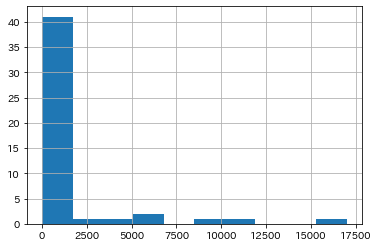

In [5]:
isl.hist()

### 箱ひげ図
---
- 中央値・四分位点・外れ値を一度に可視化できるグラフである。
    - 四角 (箱) の上下間 = 四分位範囲 (25%点 ~ 75%点)
    - 四角 (箱) の中の線 = 中央値
    - 上下に伸びた線 (ひげ) = 箱の上 (下) から箱の高さの1.5倍を延長した範囲 (データの最小値・最大値は超えない)
    - 上下の点 = 外れ値
- pd.DataFrame.boxplot を用いて描画する。

In [6]:
#関数の説明を表示
help(pd.DataFrame.boxplot)

Help on function boxplot_frame in module pandas.plotting._core:

boxplot_frame(self, column=None, by=None, ax=None, fontsize=None, rot=0, grid=True, figsize=None, layout=None, return_type=None, backend=None, **kwargs)
    Make a box plot from DataFrame columns.
    
    Make a box-and-whisker plot from DataFrame columns, optionally grouped
    by some other columns. A box plot is a method for graphically depicting
    groups of numerical data through their quartiles.
    The box extends from the Q1 to Q3 quartile values of the data,
    with a line at the median (Q2). The whiskers extend from the edges
    of box to show the range of the data. By default, they extend no more than
    `1.5 * IQR (IQR = Q3 - Q1)` from the edges of the box, ending at the farthest
    data point within that interval. Outliers are plotted as separate dots.
    
    For further details see
    Wikipedia's entry for `boxplot <https://en.wikipedia.org/wiki/Box_plot>`_.
    
    Parameters
    ----------
    co

In [7]:
ins = pd.read_csv('./data/InsectSprays.csv')
ins.tail()

,count,spray
67,10,F
68,26,F
69,26,F
70,24,F
71,13,F


<AxesSubplot:title={'center':'count'}, xlabel='[spray]'>

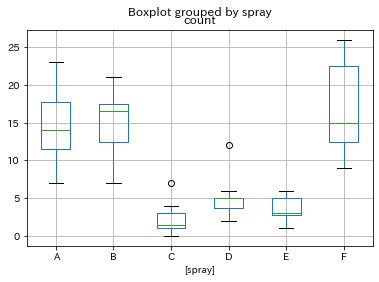

In [8]:
ins.boxplot(by='spray')

### 棒グラフ (bar plot)
---
- pd.DataFrame.plot.bar を用いて描画する。

In [9]:
#関数の説明を表示
help(pd.DataFrame.plot.bar)

Help on function bar in module pandas.plotting._core:

bar(self, x=None, y=None, **kwargs)
    Vertical bar plot.
    
    A bar plot is a plot that presents categorical data with
    rectangular bars with lengths proportional to the values that they
    represent. A bar plot shows comparisons among discrete categories. One
    axis of the plot shows the specific categories being compared, and the
    other axis represents a measured value.
    
    Parameters
    ----------
    x : label or position, optional
        Allows plotting of one column versus another. If not specified,
        the index of the DataFrame is used.
    y : label or position, optional
        Allows plotting of one column versus another. If not specified,
        all numerical columns are used.
    color : str, array_like, or dict, optional
        The color for each of the DataFrame's columns. Possible values are:
    
        - A single color string referred to by name, RGB or RGBA code,
            for insta

In [10]:
va = pd.read_csv('./data/VADeaths.csv', index_col=0)
va

,Rural Male,Rural Female,Urban Male,Urban Female
50-54,11.7,8.7,15.4,8.4
55-59,18.1,11.7,24.3,13.6
60-64,26.9,20.3,37.0,19.3
65-69,41.0,30.9,54.6,35.1
70-74,66.0,54.3,71.1,50.0


<AxesSubplot:>

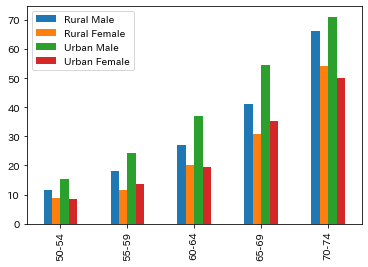

In [11]:
va.plot.bar()

<AxesSubplot:>

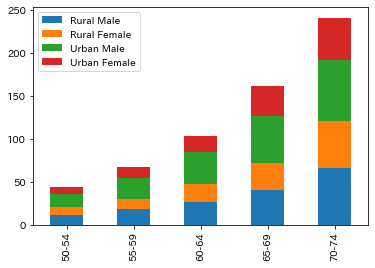

In [12]:
va.plot.bar(stacked=True)

### モザイク図 (mosaic plot)
---
- 数値の大きさを面性で表すプロットである。
    - クロス集計表の視覚化などに利用される。
- statsmodels.graphics.mosaicplot.mosaic を用いる。

In [14]:
#関数の説明を表示
help(mosaic)

Help on function mosaic in module statsmodels.graphics.mosaicplot:

mosaic(data, index=None, ax=None, horizontal=True, gap=0.005, properties=<function <lambda> at 0x172c99280>, labelizer=None, title='', statistic=False, axes_label=True, label_rotation=0.0)
    Create a mosaic plot from a contingency table.
    
    It allows to visualize multivariate categorical data in a rigorous
    and informative way.
    
    Parameters
    ----------
    data : {dict, Series, ndarray, DataFrame}
        The contingency table that contains the data.
        Each category should contain a non-negative number
        with a tuple as index.  It expects that all the combination
        of keys to be represents; if that is not true, will
        automatically consider the missing values as 0.  The order
        of the keys will be the same as the one of insertion.
        If a dict of a Series (or any other dict like object)
        is used, it will take the keys as labels.  If a
        np.ndarray is 

In [15]:
titanic = pd.read_csv('./data/titanic.csv')
titanic.tail()

,Class,Sex,Age,Survived
2197,Crew,Female,Adult,Yes
2198,Crew,Female,Adult,Yes
2199,Crew,Female,Adult,Yes
2200,Crew,Female,Adult,Yes
2201,Crew,Female,Adult,Yes


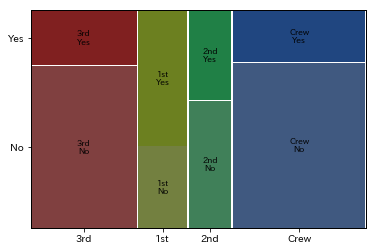

In [16]:
mosaic(titanic, ['Class', 'Survived'])
plt.show()

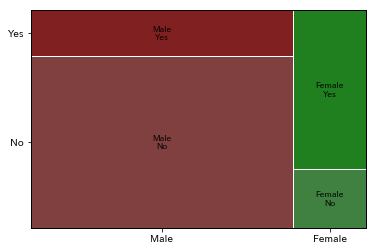

In [17]:
mosaic(titanic, ['Sex', 'Survived'])
plt.show()

## （参考）その他のグラフについて
---
- 上記のコードは随時追加していく予定である。
- 上記以外のものについては、[pandasのドキュメント](https://pandas.pydata.org/pandas-docs/stable/visualization.html)や[seabornのチュートリアル](https://seaborn.pydata.org/tutorial/distributions.html)を参照すると良い。